# Load Dependencies :

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

# Load and Preparing data :

In [2]:
import os

path = os.listdir('../Project-2/Brain_Tumor/Training/')
classes = {'no_tumor':0 , 'pituitary_tumor':1}

In [3]:
import cv2

X = []
Y = []
for cls in classes:
    pth = '../Project-2/Brain_Tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        img = cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])

# Data Analysis :

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X),-1)

In [5]:
X_updated

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [6, 6, 6, ..., 6, 6, 6],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [7]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6],
        ...,
        [6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [2, 2, 2, ..., 2, 2, 2],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 1, 0, 0],
        [2, 2, 2, ..., 2, 2, 1],
        [4, 4, 4, ..., 5, 3, 2],
        ...,
        [3, 3, 3, ..., 

In [9]:
X.shape , X_updated.shape

((1222, 200, 200), (1222, 40000))

# Data Visualization :

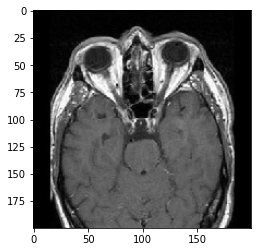

In [10]:
plt.imshow(X[0],cmap='gray')

# Split Data :

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_updated,Y,test_size=0.3,random_state=42)

# Feature scaling :

In this step, we are going to use minmax scaling technique to bring all the feature values to less than or equal to 1. In order to do so, we have divided the training data by its maximum value.

In [12]:
X_train = X_train/255
X_test = X_test/255

# Model Training :

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [16]:
lg = LogisticRegression(C=0.1)
lg.fit(X_train,y_train)

LogisticRegression(C=0.1)

In [18]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

# Evaluation :

**For SVC model :**

In [19]:
print("Training Score : ",svc.score(X_train,y_train))
print("Testing Score : ",svc.score(X_test,y_test))

Training Score :  0.9906432748538012
Testing Score :  0.9482288828337875


**For Logistic Regression Model :**

In [21]:
print("Training Score : ",lg.score(X_train,y_train))
print("Testing Score : ",lg.score(X_test,y_test))

Training Score :  1.0
Testing Score :  0.9373297002724795


As we can observe, SVM showed a great balance among training an testing score as compared to Logistic Regression. So we can reach to the conclusion that it is ideal model for this particular dataset

# Testing (On test dataset) :

In [22]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

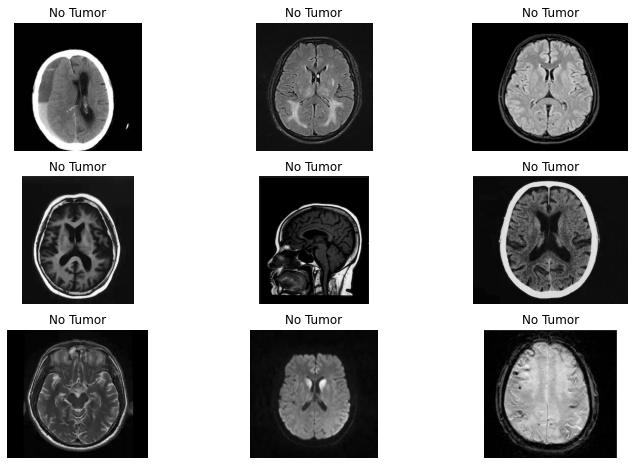

In [33]:
plt.figure(figsize=(12,8))
p = os.listdir('Brain_Tumor/Testing/')
c=1
for i in os.listdir("Brain_Tumor/Testing/no_tumor")[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = svc.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

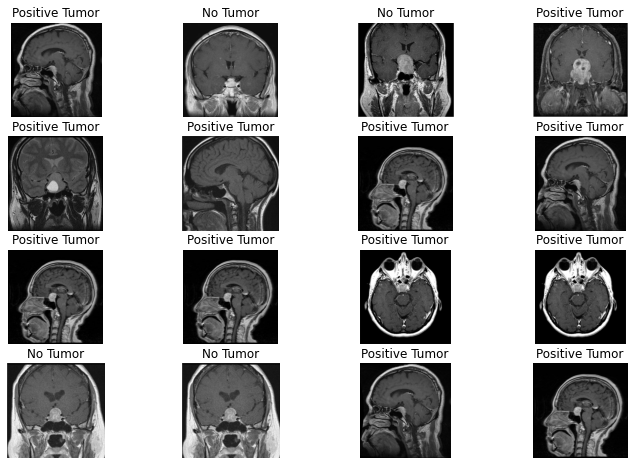

In [34]:
plt.figure(figsize=(12,8))
p = os.listdir('Brain_Tumor/Testing/')
c=1
for i in os.listdir('Brain_Tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('Brain_Tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = svc.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

**THANK YOU ...**